In [40]:
#import required modules - figures created using pandas dataframes and seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
from adjustText import adjust_text

In [41]:
#load in datasets from csv files
titer = pd.read_csv(r'data/viral_titer_cas9_cas12a.csv') #viral titer measurements

transduction_rates = pd.read_csv(r'data/transduction_rates.csv') #transduction efficiency values

recovery_time = pd.read_csv(r'data/cas12a_cas9_expansion_time.csv') #recovery time df by cas enzyme

screen_size = pd.read_csv(r'data/humagne_avana_expansion_size.csv') #screen size (virus volume and expansion size

nnmd = pd.read_csv(r'data/avana_humagne_nnmd.csv') #nnmd values determined post-screen

screen_qc = pd.read_csv(r'data/qc_metrics_retreat21.csv') #screen qc metrics from Isabella in CDS 

In [42]:
#clean raw screen size df
screen_size = screen_size.melt(id_vars = 'cell_line', value_vars = ['humagne_flasks', 'avana_flasks', 'humagne_virus', 'avana_virus'])
screen_size['library'] = screen_size['variable'].str.split('_').str[0]

In [43]:
#function to match color palettes across figures allowing easy change of colors in all figures
#by changing colors in this function
def create_palette_dict(var_1, var_2):
    background_pal = [sns.color_palette('Spectral')[1], sns.color_palette('Spectral')[4]] #set color for box, violin, etc 
    
    colors = {var_1 : sns.color_palette('gist_yarg')[3], 
              var_2 : sns.color_palette('gist_yarg')[4]} #create dict for points 
    
    return background_pal, colors

In [173]:
#sns.color_palette('Spectral')[1], sns.color_palette('Spectral')[4]
print(sns.color_palette('Spectral').as_hex())

['#e2514a', '#fca55d', '#fee999', '#edf8a3', '#a2d9a4', '#47a0b3']


In [169]:
sns.color_palette('gist_yarg')

[(0.8588235294117648, 0.8588235294117648, 0.8588235294117648),
 (0.7137254901960784, 0.7137254901960784, 0.7137254901960784),
 (0.5725490196078431, 0.5725490196078431, 0.5725490196078431),
 (0.4274509803921569, 0.4274509803921569, 0.4274509803921569),
 (0.28627450980392155, 0.28627450980392155, 0.28627450980392155),
 (0.14117647058823535, 0.14117647058823535, 0.14117647058823535)]

In [170]:
#comparing viral titer- boxplot overlayed with stripplot
def titer_comparison(raw_df):
    #sort df and add column for log2 values
    titer_df = raw_df.sort_values(by = 'vector_name', ascending = False)
    titer_df['titer_log2'] = titer_df.apply(lambda row: math.log2(row['titer']), axis = 1)

    #get boxplot background and stripplot colors 
    background_pal, colors = create_palette_dict('pXPR_111', 'pRDA_174')
    
    #boxplot 
    sns.boxplot(data = titer_df, x = 'vector_name', y = 'titer_log2',
                palette = background_pal,
                boxprops = dict(alpha = 0.6)
               )
    #overlayed with stripplot
    sns.stripplot(data = titer_df, x = 'vector_name', y = 'titer_log2',
                  palette = colors,
                  size=6, color=".3", linewidth = 1.5,
               )

    #plot parameters
    plt.grid(axis = 'y', alpha = 0.4)

    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.tick_params(axis='both', which='minor', labelsize=13)
    
    plt.xticks(ticks = [0,1], labels = ['pXPR_111\nSpCas9', 'pRDA_174\nEnAsCas12a'])

    plt.ylabel('Viral Particles/mil (log2)', size = 18)
    plt.xlabel('', size = 16)

    plt.title('pRDA_174 Has ~4 fold\nHigher Titer than pXPR_111', fontweight = 'bold', size = 22, color = 'k')
    
    #save figure as png
    #plt.savefig(r'graphs/titer_comparison.png', dpi = 600, bbox_inches = 'tight', facecolor = 'w')

In [47]:
#comparing transduction rate - boxplot overlaid with stripplot
def transduction_rate_comparison(raw_df):
    #convert df to have one column with two variables
    df = raw_df.melt()
    
    fig, ax = plt.subplots(1,1)
    
    #get boxplot background and stripplot colors 
    background_pal, colors = create_palette_dict('cas9', 'cas12a')

    sns.violinplot(data = df, x = 'variable', y = 'value',
                  palette = background_pal,
                   scale = 'width',
                   inner = 'quartile',
                   bw = 0.4,
                  cut = 0.15,
                  )

    plt.setp(ax.collections, alpha= 0.6)

    sns.swarmplot(data = df, x = 'variable', y = 'value',
                  palette = colors,
                  dodge = False,
                  size=6, color=".3", linewidth = 1.5,
                 )

    plt.grid(axis = 'y', alpha = 0.4)

    plt.ylim(0,110)

    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.tick_params(axis='both', which='minor', labelsize=13)
    
    plt.xticks(ticks = [0,1], labels = ['SpCas9', 'EnAsCas12a'])

    plt.ylabel('Transduction Efficiency (%)', size = 18)
    plt.xlabel('', size = 16)

    plt.title('Higher Titer Led to\nIncreased Transduction Rates', fontweight = 'bold', size = 22, color = 'k')

    #plt.savefig(r'graphs/transduction_rates.png', dpi = 600, bbox_inches = 'tight', facecolor = 'w')

In [48]:
#comparing recovery times b/w cas enzymes/vectors
def recovery_time_comparison(raw_df):
    df = raw_df.copy()
    #sort so cas9 is on left hand side
    df = df.sort_values(by = 'cas_type', ascending = True)
    
    
    fig, ax = plt.subplots()
    
    #create color palette variables
    background_pal, colors = create_palette_dict('Cas9', 'enAsCas12a')
    
    sns.boxplot(y="expansion_time", x="cas_type", data = df,
                palette=background_pal,
               boxprops = dict(alpha = 0.6),
               ax = ax)
    
    # Add in points to show each observation
    sns.stripplot(y="expansion_time", x="cas_type", data = df,
                  size=6, color= colors, linewidth=1.5,
                  jitter = 0.05, 
                 palette = colors,
                 ax = ax)

    plt.grid(axis = 'y', alpha = 0.4)

    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.tick_params(axis='both', which='minor', labelsize=13)
    
    plt.xticks(ticks = [0,1], labels = ['SpCas9', 'EnAsCas12a'])

    plt.ylabel('Recovery Time (Days)', size = 18)
    plt.xlabel('', size = 18)

    plt.title('EnAsCas12a Transductions\nRecovered Faster', fontweight = 'bold', size = 22, color = 'k')
    
    #save figure
    #plt.savefig(r'graphs/recovery_time.png', dpi = 600, bbox_inches = 'tight', facecolor = 'w')


In [49]:
def screen_size_figure(raw_df):
    #sort to have cas9-avana screens on left of plot
    df = raw_df.copy()
    df = df.sort_values(by = 'library', ascending = True)

    #set color palette 
    background_pal, colors = create_palette_dict('avana', 'humagne')

    fig, axs = plt.subplots(1,2, sharey = True, sharex = False, figsize = (15,5))

    #set dataframes for two axes
    df_flasks = df[df['variable'].str.contains('flasks')]
    df_virus = df[df['variable'].str.contains('virus')]

    #barplot comparing flasks required for screen
    sns.boxplot(data = df_flasks, x = 'value', y = 'library',
                hue = 'variable', dodge = False,
               palette = background_pal,
                boxprops = dict(alpha = 0.6),
                ax = axs[0],
               )

    axs[0].legend().remove() #remove unnecessary legend 

    #overlapping stripplot of datapoints
    sns.stripplot(data = df_flasks, x = 'value', y = 'library',
                  palette = colors,
                  size=6, color=".3", linewidth = 1.5,
                  ax = axs[0],
                  jitter = 0.05,
                     )

    #set plot parameters
    axs[0].grid(axis = 'x', alpha = 0.4)

    axs[0].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = 14)

    axs[0].set_yticks(ticks = [0,1], labels = ['Avana4', 'Humagne'], size = 18) 
    axs[0].set_xticks(ticks = np.arange(0,21,2), fontsize = 14) 

    axs[0].set_ylabel('', size = 18)
    axs[0].set_xlabel('Flasks Required to Start Screen', size = 18)

    axs[0].set_title('Humagne Screens Required\n~40% of the Expansion', fontweight = 'bold', size = 22, color = 'k')

    #barplot comparing flasks required for screen
    sns.boxplot(data = df_virus, x = 'value', y = 'variable',
                hue = 'variable', dodge = False,
               palette = background_pal,
                boxprops = dict(alpha = 0.6),
                ax = axs[1]
               )

    plt.legend().set_visible(False) #remove unnecessary legend 

    #overlapping stripplot of datapoints
    sns.stripplot(data = df_virus, x = 'value', y = 'library',
                  palette = colors,
                  size=6, color=".3", linewidth = 1.5,
                  ax = axs[1],
                  jitter = 0.05,
                 )

    #set plot parameters
    axs[1].grid(axis = 'x', alpha = 0.4)
    
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = 14)

    axs[1].set_xticks(ticks = np.arange(0,55,5), fontsize = 14) 
    axs[1].set_yticks(ticks = [0,1], labels = ['Avana4', 'Humagne'], size = 18) 

    axs[1].set_ylabel('', size = 18)
    axs[1].set_xlabel('Volume (mL) Library Lentivirus', size = 18)

    axs[1].set_title('Humagne Screens Used\n~30% of the Lentivirus', fontweight = 'bold', size = 22, color = 'k')

    fig.tight_layout()
    
    #save figure
    #plt.savefig(r'graphs/screen_size_combined_fig.png', dpi = 600, bbox_inches = 'tight', facecolor = 'w')

In [160]:
def screen_qc_comparison(raw_df) : #, batch_df):
    df = raw_df.copy()
    
    #filter out underselected cell lines
    df = df[df['blast_dose'] > 7]
    
    #color palette 
    pal = sns.color_palette('Dark2', as_cmap = True)

    #hue for scatter plots
    hue = df.index
    
    #point size 
    point_size = 50
    
    #merge dfs to include column for blast
    #df = df.set_index('cell_line').merge(batch_df[['cell_line', 'batch']].set_index('cell_line'), left_index = True, right_index = True).reset_index()
    
    #subplots figure for four metrics of screen quality
    fig, axs = plt.subplots(2,2, figsize = (10,10))
    
    #nnmd comparison
    sns.scatterplot(data = df, x = 'cas9_naive_nnmds', y = 'naive_nnmds',
                    hue = hue, palette = pal,
                    s = point_size,
                    ax = axs[0,0]).legend().remove()
    

    #line plot of x=y (diagonal line for reference)
    axs[0,0].plot(np.arange(-1,-9.1,-1), np.arange(-1,-9.1,-1), linestyle = 'dashed', color = 'b', linewidth = 0.4)
    #annotate line to show which library performed better
    """
    axs[0,0].annotate(xy = (-8.4, -7.5), text = 'Avana\nBetter', color = 'b',
                      #arrowprops = dict(arrowstyle = 'simple'),
                     rotation = -45)
    axs[0,0].annotate(xy = (-7.76, -8.76), text = 'Humagne\nBetter', color = 'b',
                      #arrowprops = dict(arrowstyle = 'simple'),
                     rotation = -45)
    """
    
    
    #nnmd plot parameters
    axs[0,0].set_xticks(ticks = np.arange(-1,-9.1,-1), fontsize = 13)
    axs[0,0].set_yticks(ticks = np.arange(-1,-9.1,-1), fontsize = 13)
    axs[0,0].set_xlabel('Avana NNMD', size = 16)
    axs[0,0].set_ylabel('Humagne NNMD', size = 16)
    axs[0,0].set_title('NNMD', size = 20, fontweight = 'bold', color = 'k')
    
    """
    #ROC AUC comparison
    sns.scatterplot(data = df, x = 'cas9_naive_roc_aucs', y = 'naive_roc_aucs',
                    hue = hue, palette = pal,
                    s = point_size,
                    ax = axs[0,1]).legend().remove()
    
    #line plot of x=y (diagonal line for reference)
    axs[0,1].plot(np.arange(0.8,1.01,0.025), np.arange(0.8,1.01,0.025), linestyle = 'dashed', color = 'b', linewidth = 0.4)
    
    #ROCAUC plot parameters
    axs[0,1].set_xticks(ticks = np.arange(0.8,1.01,0.025), fontsize = 13)
    axs[0,1].set_yticks(ticks = np.arange(0.8,1.01,0.025), fontsize = 13)
    axs[0,1].set_xlabel('Avana ROC AUC', size = 16)
    axs[0,1].set_ylabel('Humagne ROC AUC', size = 16)
    axs[0,1].set_title('ROC AUC', size = 20, fontweight = 'bold', color = 'k')
    """
    #remove roc/auc figure
    axs[0, 1].axis('off')
    
    #mean depletion of common essentials comparison
    sns.scatterplot(data = df, x = 'cas9_naive_mean_dep_ess', y = 'naive_mean_dep_ess',
                    hue = hue, palette = pal,
                    s = point_size,
                    ax = axs[1,0]).legend().remove()
    
    #line plot of x=y (diagonal line for reference)
    axs[1,0].plot(np.arange(-0.4,-3.01,-0.5), np.arange(-0.4,-3.01,-0.5), linestyle = 'dashed', color = 'b', linewidth = 0.4)
    
    #reverse axes to correspond with rest of plots
    axs[1,0].invert_xaxis()
    axs[1,0].invert_yaxis()
    
    #mean dep common ess plot parameters
    axs[1,0].set_xticks(ticks = np.arange(-0.4,-3.01,-0.5), fontsize = 13)
    axs[1,0].set_yticks(ticks = np.arange(-0.4,-3.01,-0.5), fontsize = 13)
    axs[1,0].set_xlabel('Avana Mean Depletion', size = 16)
    axs[1,0].set_ylabel('Humagne Mean Depletion', size = 16)
    axs[1,0].set_title('Mean Depletion\nof Essentials', size = 20, fontweight = 'bold', color = 'k')

    #stdev of non-essentials comparison
    sns.scatterplot(data = df, x = 'cas9_naive_std_dev_ness', y = 'naive_std_dev_ness',
                    hue = hue, palette = pal,
                    s = point_size,
                    ax = axs[1,1]).legend().remove()
    
    #line plot of x=y (diagonal line for reference)
    axs[1,1].plot(np.arange(0.1,0.6,0.05), np.arange(0.1,0.6,0.05), linestyle = 'dashed', color = 'b', linewidth = 0.4)
    
    #std dev non-ess plot parameters
    axs[1,1].set_xticks(ticks = np.arange(0.1,0.6,0.05), fontsize = 13)
    axs[1,1].set_yticks(ticks = np.arange(0.1,0.6,0.05), fontsize = 13)
    axs[1,1].set_xlabel('Avana Std Deviation', size = 16)
    axs[1,1].set_ylabel('Humagne Std Deviation', size = 16)
    axs[1,1].set_title('Std Deviation\nof Non-Essentials', size = 20, fontweight = 'bold', color = 'k')
    
    #reverse axes to correspond with rest of plots
    axs[1,1].invert_xaxis()
    axs[1,1].invert_yaxis()
    
    #annotate all plots with cell line names and adjust texts to avoid overlap
    df = df.set_index('cell_line').fillna(0)
    plts_axes_xy = [[0,0,'cas9_naive_nnmds', 'naive_nnmds'], #[0,1,'cas9_naive_roc_aucs', 'naive_roc_aucs'], 
                    [1,0,'cas9_naive_mean_dep_ess', 'naive_mean_dep_ess'], [1,1,'cas9_naive_std_dev_ness', 'naive_std_dev_ness']]
                    
    for axes1, axes2, x, y in plts_axes_xy: 
        texts = []
        for line in df.index.unique():
            x0 = float(df.loc[line][x])
            y0 = float(df.loc[line][y])
            text = str(line)
            if x != np.NaN:
                texts.append(axs[axes1, axes2].text(s = text, x = x0, y = y0, fontsize = 10, alpha = 0.8))
        if x in ['cas9_naive_std_dev_ness']:
            adjust_text(texts,
                        arrowprops = dict(arrowstyle="->", color='k', lw=0.3),
                        va = 'top', ha = 'right'
                       )
        
    #generic axes parameters
    for x, y in zip([0, 0, 1, 1], [0, 1, 0, 1]):
        axs[x,y].grid(axis = 'both', alpha = 0.4)
        
    #tight layout
    fig.tight_layout()
    
    #main title
    #fig.suptitle('QC Metrics Comparable Between Libraries', size = 22, fontweight = 'bold')
    
    #save fig
    #fig.savefig(r'graphs/screen_qc_metrics_no_rocauc.png', bbox_inches = 'tight', facecolor = 'w', dpi = 600)
    

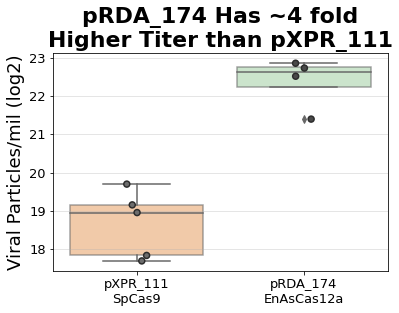

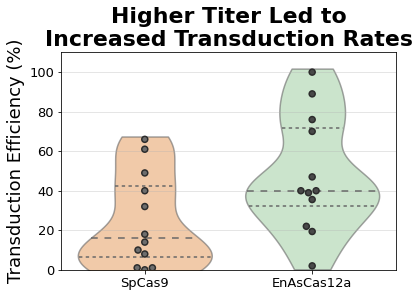

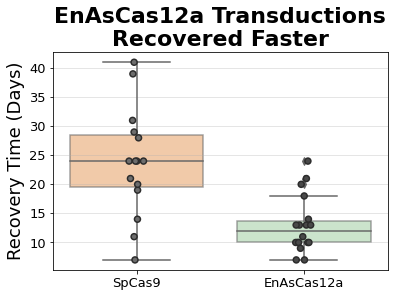

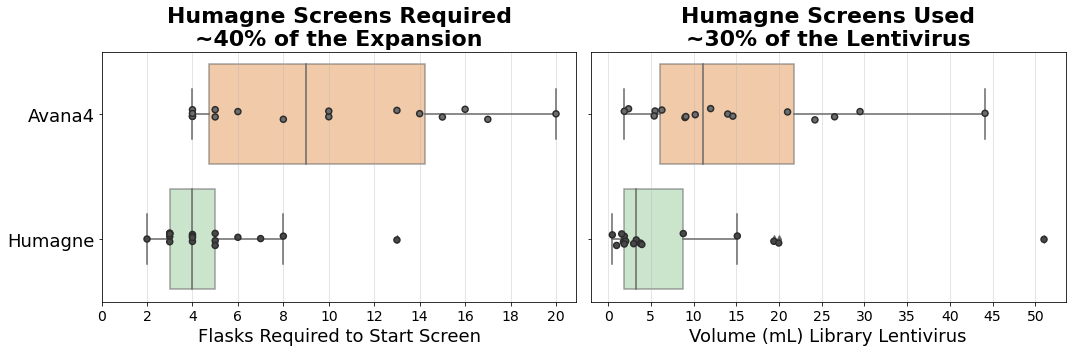

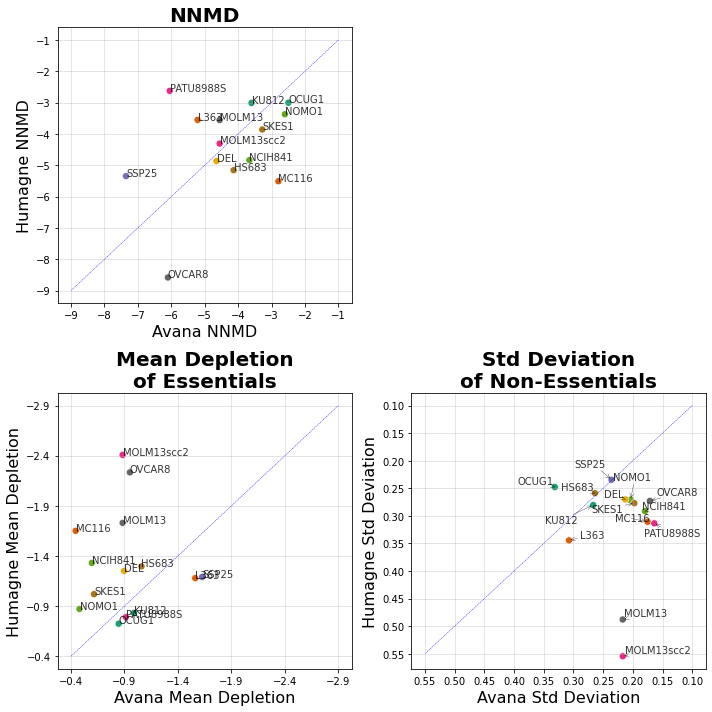

In [174]:
"""
MAIN function to run all plots 
"""
titer_comparison(titer) #compare viral titers
transduction_rate_comparison(transduction_rates) #compare transduction rates
recovery_time_comparison(recovery_time) #compare recovery time b/w cas and vector
screen_size_figure(screen_size) #combined figure of screen size
screen_qc_comparison(screen_qc)